# Mushroom Classification

This notebook have a data from UCI Machine Learning Repository, the data is about mushrooms and the goal is to classify if a mushroom is edible or poisonous.
I am studying this dataset because a new dataset is generated from this one by Kaggle for a competition, and I want to understand the data.
Kaggle is using the new dataset for their playground competition, [season 4 episode 8](https://www.kaggle.com/competitions/playground-series-s4e8/data).

But this notebook is just for the UCI dataset, and I will analyze the new dataset in another notebook.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from ucimlrepo import fetch_ucirepo 

In [3]:
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 
  
# metadata 
mushroom.metadata

{'uci_id': 73,
 'name': 'Mushroom',
 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom',
 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv',
 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible',
 'area': 'Biology',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 8124,
 'num_features': 22,
 'feature_types': ['Categorical'],
 'demographics': [],
 'target_col': ['poisonous'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1981,
 'last_updated': 'Thu Aug 10 2023',
 'dataset_doi': '10.24432/C5959T',
 'creators': [],
 'intro_paper': None,
 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely 

In [4]:
# variable information 
mushroom.variables

,name,role,type,demographic,description,units,missing_values
0,poisonous,Target,Categorical,None,None,None,no
1,cap-shape,Feature,Categorical,None,"bell=b,conical=c,convex=x,flat=f, knobbed=k,su...",None,no
2,cap-surface,Feature,Categorical,None,"fibrous=f,grooves=g,scaly=y,smooth=s",None,no
3,cap-color,Feature,Binary,None,"brown=n,buff=b,cinnamon=c,gray=g,green=r, pink...",None,no
4,bruises,Feature,Categorical,None,"bruises=t,no=f",None,no
5,odor,Feature,Categorical,None,"almond=a,anise=l,creosote=c,fishy=y,foul=f, mu...",None,no
6,gill-attachment,Feature,Categorical,None,"attached=a,descending=d,free=f,notched=n",None,no
7,gill-spacing,Feature,Categorical,None,"close=c,crowded=w,distant=d",None,no
8,gill-size,Feature,Categorical,None,"broad=b,narrow=n",None,no
9,gill-color,Feature,Categorical,None,"black=k,brown=n,buff=b,chocolate=h,gray=g, gre...",None,no


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [6]:
ydf = pd.DataFrame({
    'Count': y.value_counts(),
    'Proportion': (y.value_counts(normalize=True)*100).round(2).astype(str) + '%'
})

ydf

,Count,Proportion
poisonous,,
e,4208,51.8%
p,3916,48.2%


## Handling missing values

In [7]:
X.isna().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [8]:
# stake-root missing values in percentage
stalk_root_missing = (X['stalk-root'].isna().sum() / X.shape[0]) * 100
print(f"stalk-root missing values in percentage: {stalk_root_missing:.2f}%")

X['stalk-root'].value_counts()

stalk-root missing values in percentage: 30.53%


stalk-root
b    3776
e    1120
c     556
r     192
Name: count, dtype: int64

The `stalk-root` column has 2480 missing values, which is 30.53% of the data. It's not feasible to drop the column, so I will keep a placeholder for the missing values. 

In [9]:
X = X.fillna({'stalk-root':'missing'})

In [10]:
X['stalk-root'].value_counts()

stalk-root
b          3776
missing    2480
e          1120
c           556
r           192
Name: count, dtype: int64

In [11]:
X.isna().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## Exploratory Data Analysis

The dataset has 8124 rows and 23 columns, the target column is `poisonous` and the other columns are features. The target column has two classes, `e` for edible and `p` for poisonous. We will merge the classes in a single column to make it easier to analyze.

In [12]:
pd.set_option('display.max_columns', None)

In [13]:
y.isna().sum()

poisonous    0
dtype: int64

In [14]:
df = pd.concat([X, y], axis=1)
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g,e


In [15]:
df.isna().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
poisonous                   0
dtype: int64

To plot the values and better understand, I am changing the target column names to more descriptive values, `edible` and `poisonous`.

In [16]:
mapping = {
    'e': 'edible',
    'p': 'poisonous'
}

# Apply the mapping
df['poisonous'] = df['poisonous'].map(mapping)

In [17]:
def analyze_categorical_feature(df, feature, target="Transported"):
    """
    Analyze a categorical feature in the context of the target variable.
    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    feature (str): The name of the categorical feature to analyze.
    target (str): The target variable for analysis. Default is "Transported".
    Returns:
    pd.DataFrame: A dataframe summarizing the count and percentage distribution 
                  of the feature, along with the transport status percentages.
    """
    # Calculate the distribution and transport percentages
    summary_df = pd.DataFrame({
        "Count": df[feature].value_counts(),
        "Percentage": df[feature].value_counts(normalize=True) * 100,
        "Poisonous": df.groupby(feature)[target].value_counts(normalize=True).unstack()['poisonous'] * 100,
        "Edible": df.groupby(feature)[target].value_counts(normalize=True).unstack()['edible'] * 100
    })

    # Custom color palette for target variable
    palette = {'poisonous': '#e57373', 'edible': '#81c784'}

    # Plot the feature distribution with respect to the target
    sns.countplot(df, x=feature, hue=target, palette=palette)
    plt.title(f'Distribution of {feature} with respect to {target}')
    plt.show()

    # Return the summary dataframe
    return summary_df

In [18]:
features = df.columns.tolist()
features.remove('poisonous')
print(features)

['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']



Cap-shape:


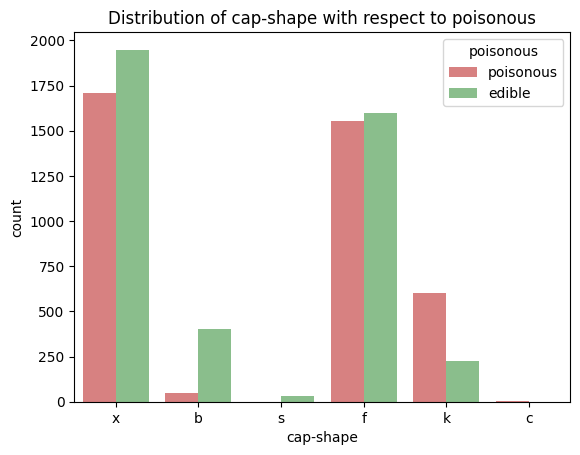

,Count,Percentage,Poisonous,Edible
cap-shape,,,,
b,452,5.563762,10.619469,89.380531
c,4,0.049237,100.000000,NaN
f,3152,38.798621,49.365482,50.634518
k,828,10.192024,72.463768,27.536232
s,32,0.393895,NaN,100.000000
x,3656,45.002462,46.717724,53.282276



Cap-surface:


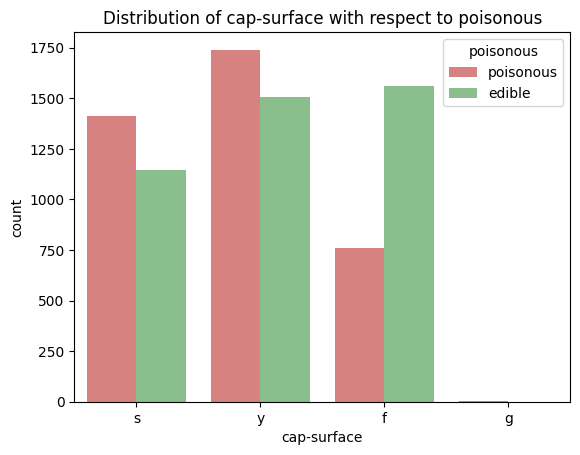

,Count,Percentage,Poisonous,Edible
cap-surface,,,,
f,2320,28.557361,32.758621,67.241379
g,4,0.049237,100.000000,NaN
s,2556,31.462334,55.242567,44.757433
y,3244,39.931068,53.637485,46.362515



Cap-color:


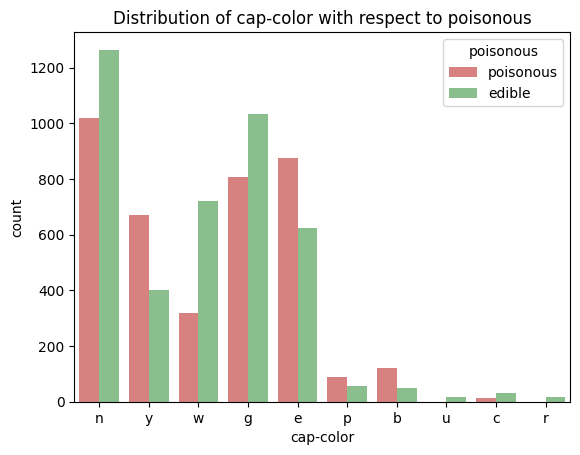

,Count,Percentage,Poisonous,Edible
cap-color,,,,
b,168,2.067947,71.428571,28.571429
c,44,0.541605,27.272727,72.727273
e,1500,18.463811,58.400000,41.600000
g,1840,22.648941,43.913043,56.086957
n,2284,28.114229,44.658494,55.341506
p,144,1.772526,61.111111,38.888889
r,16,0.196947,NaN,100.000000
u,16,0.196947,NaN,100.000000
w,1040,12.801576,30.769231,69.230769



Bruises:


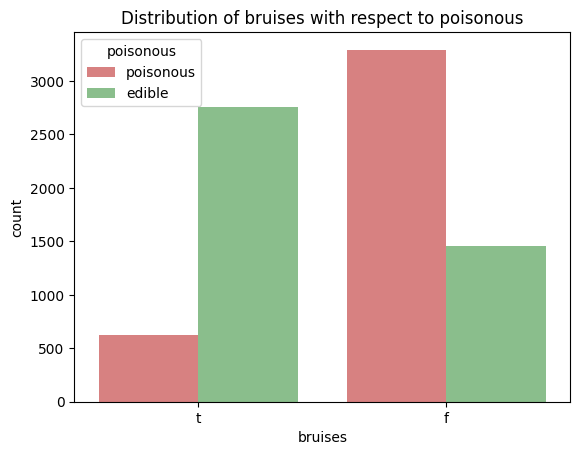

,Count,Percentage,Poisonous,Edible
bruises,,,,
f,4748,58.444116,69.334457,30.665543
t,3376,41.555884,18.483412,81.516588



Odor:


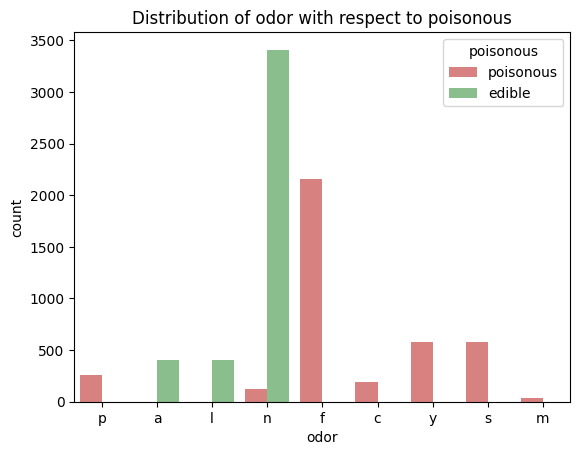

,Count,Percentage,Poisonous,Edible
odor,,,,
a,400,4.923683,NaN,100.000000
c,192,2.363368,100.000000,NaN
f,2160,26.587888,100.000000,NaN
l,400,4.923683,NaN,100.000000
m,36,0.443131,100.000000,NaN
n,3528,43.426883,3.401361,96.598639
p,256,3.151157,100.000000,NaN
s,576,7.090103,100.000000,NaN
y,576,7.090103,100.000000,NaN



Gill-attachment:


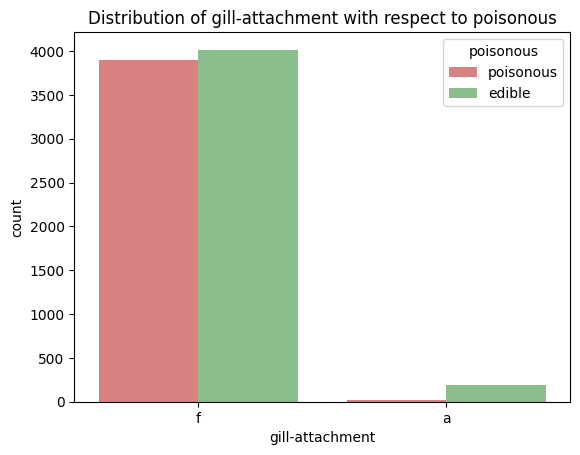

,Count,Percentage,Poisonous,Edible
gill-attachment,,,,
a,210,2.584934,8.571429,91.428571
f,7914,97.415066,49.254486,50.745514



Gill-spacing:


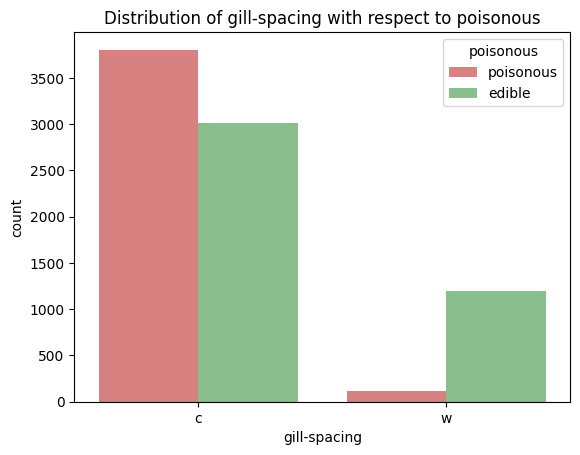

,Count,Percentage,Poisonous,Edible
gill-spacing,,,,
c,6812,83.85032,55.842631,44.157369
w,1312,16.14968,8.536585,91.463415



Gill-size:


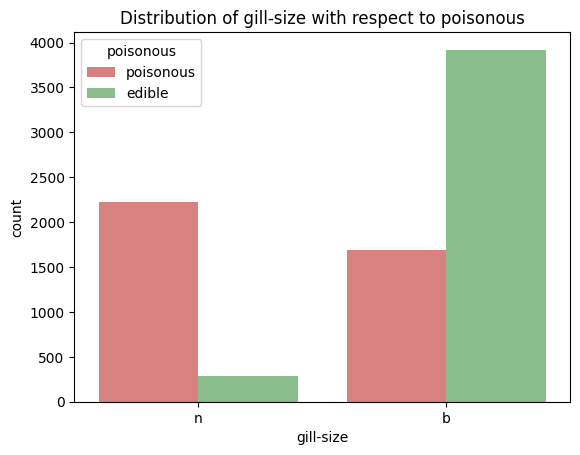

,Count,Percentage,Poisonous,Edible
gill-size,,,,
b,5612,69.079271,30.149679,69.850321
n,2512,30.920729,88.535032,11.464968



Gill-color:


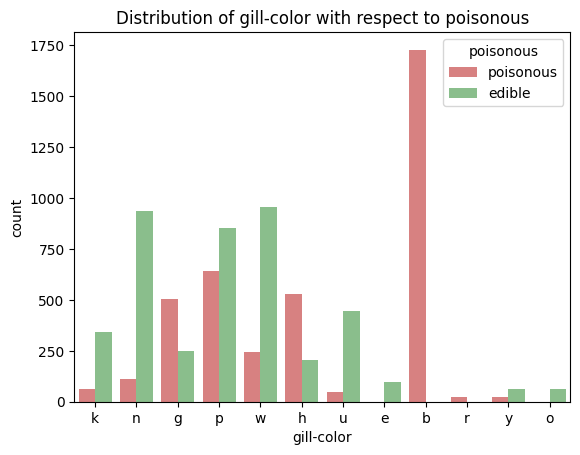

,Count,Percentage,Poisonous,Edible
gill-color,,,,
b,1728,21.270310,100.000000,NaN
e,96,1.181684,NaN,100.000000
g,752,9.256524,67.021277,32.978723
h,732,9.010340,72.131148,27.868852
k,408,5.022157,15.686275,84.313725
n,1048,12.900049,10.687023,89.312977
o,64,0.787789,NaN,100.000000
p,1492,18.365337,42.895442,57.104558
r,24,0.295421,100.000000,NaN



Stalk-shape:


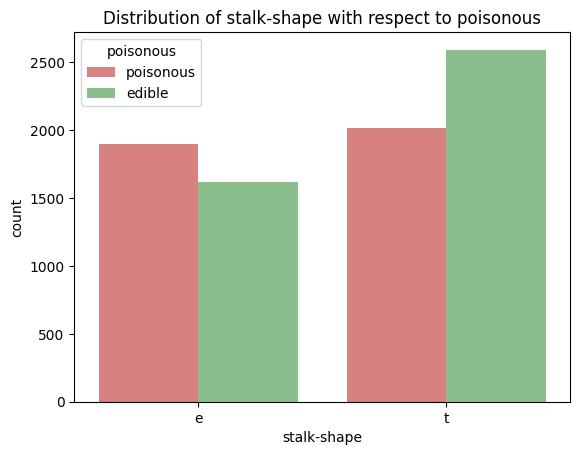

,Count,Percentage,Poisonous,Edible
stalk-shape,,,,
e,3516,43.279173,54.03868,45.96132
t,4608,56.720827,43.75000,56.25000



Stalk-root:


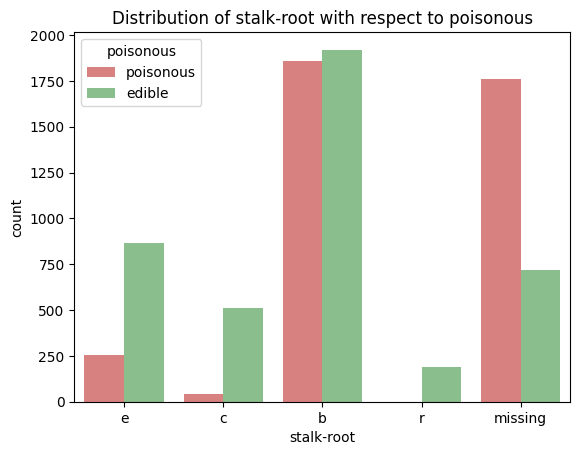

,Count,Percentage,Poisonous,Edible
stalk-root,,,,
b,3776,46.479567,49.152542,50.847458
c,556,6.843919,7.913669,92.086331
e,1120,13.786312,22.857143,77.142857
missing,2480,30.526834,70.967742,29.032258
r,192,2.363368,NaN,100.000000



Stalk-surface-above-ring:


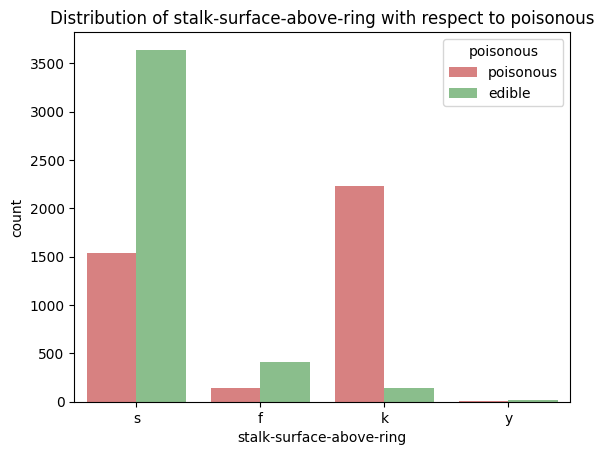

,Count,Percentage,Poisonous,Edible
stalk-surface-above-ring,,,,
f,552,6.794682,26.086957,73.913043
k,2372,29.197440,93.929174,6.070826
s,5176,63.712457,29.675425,70.324575
y,24,0.295421,33.333333,66.666667



Stalk-surface-below-ring:


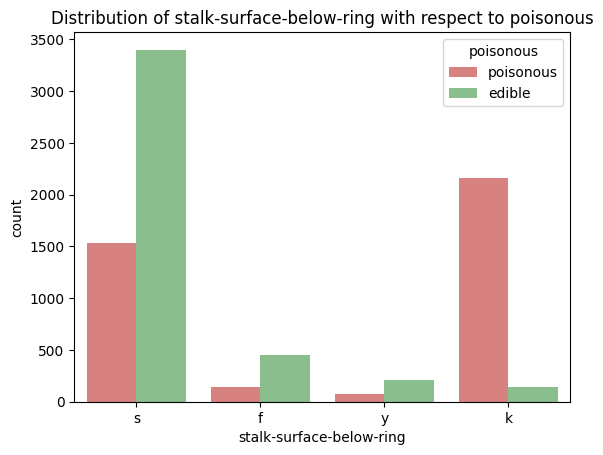

,Count,Percentage,Poisonous,Edible
stalk-surface-below-ring,,,,
f,600,7.385524,24.000000,76.000000
k,2304,28.360414,93.750000,6.250000
s,4936,60.758247,31.118314,68.881686
y,284,3.495815,26.760563,73.239437



Stalk-color-above-ring:


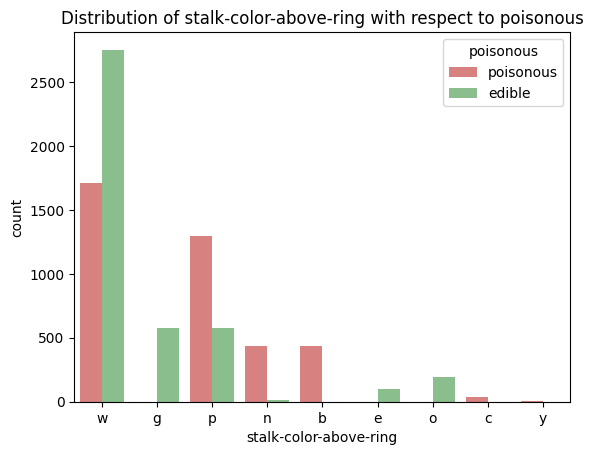

,Count,Percentage,Poisonous,Edible
stalk-color-above-ring,,,,
b,432,5.317578,100.000000,NaN
c,36,0.443131,100.000000,NaN
e,96,1.181684,NaN,100.000000
g,576,7.090103,NaN,100.000000
n,448,5.514525,96.428571,3.571429
o,192,2.363368,NaN,100.000000
p,1872,23.042836,69.230769,30.769231
w,4464,54.948301,38.351254,61.648746
y,8,0.098474,100.000000,NaN



Stalk-color-below-ring:


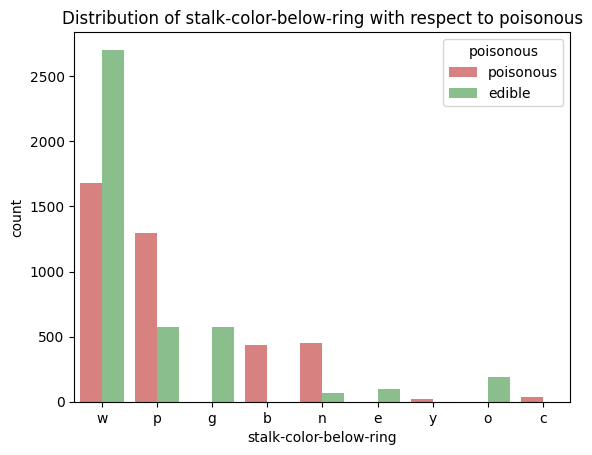

,Count,Percentage,Poisonous,Edible
stalk-color-below-ring,,,,
b,432,5.317578,100.000000,NaN
c,36,0.443131,100.000000,NaN
e,96,1.181684,NaN,100.000000
g,576,7.090103,NaN,100.000000
n,512,6.302314,87.500000,12.500000
o,192,2.363368,NaN,100.000000
p,1872,23.042836,69.230769,30.769231
w,4384,53.963565,38.321168,61.678832
y,24,0.295421,100.000000,NaN



Veil-type:


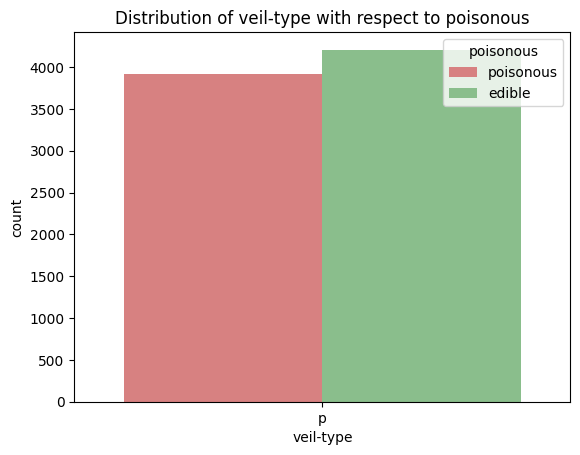

,Count,Percentage,Poisonous,Edible
veil-type,,,,
p,8124,100.0,48.202856,51.797144



Veil-color:


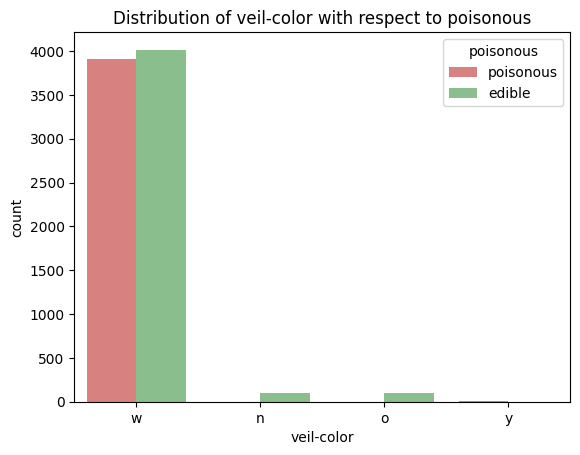

,Count,Percentage,Poisonous,Edible
veil-color,,,,
n,96,1.181684,NaN,100.000000
o,96,1.181684,NaN,100.000000
w,7924,97.538159,49.318526,50.681474
y,8,0.098474,100.000000,NaN



Ring-number:


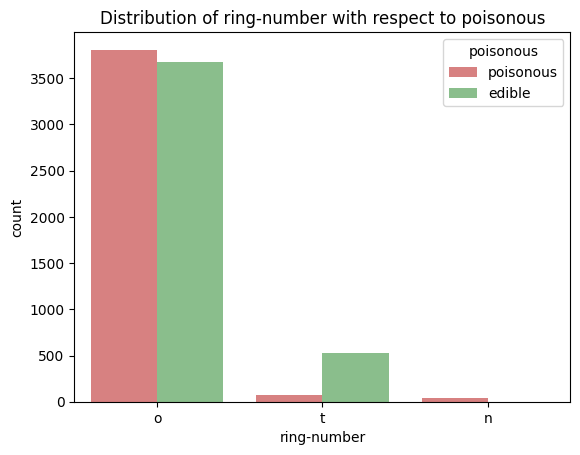

,Count,Percentage,Poisonous,Edible
ring-number,,,,
n,36,0.443131,100.000000,NaN
o,7488,92.171344,50.854701,49.145299
t,600,7.385524,12.000000,88.000000



Ring-type:


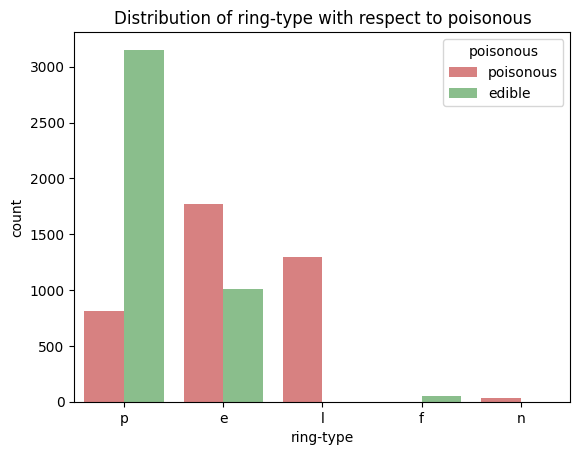

,Count,Percentage,Poisonous,Edible
ring-type,,,,
e,2776,34.170359,63.688761,36.311239
f,48,0.590842,NaN,100.000000
l,1296,15.952733,100.000000,NaN
n,36,0.443131,100.000000,NaN
p,3968,48.842935,20.564516,79.435484



Spore-print-color:


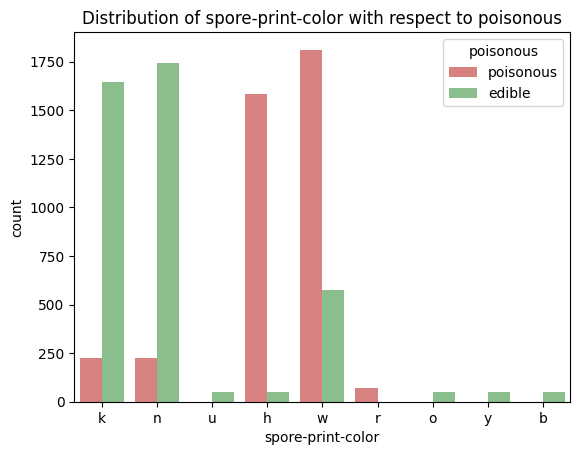

,Count,Percentage,Poisonous,Edible
spore-print-color,,,,
b,48,0.590842,NaN,100.000000
h,1632,20.088626,97.058824,2.941176
k,1872,23.042836,11.965812,88.034188
n,1968,24.224520,11.382114,88.617886
o,48,0.590842,NaN,100.000000
r,72,0.886263,100.000000,NaN
u,48,0.590842,NaN,100.000000
w,2388,29.394387,75.879397,24.120603
y,48,0.590842,NaN,100.000000



Population:


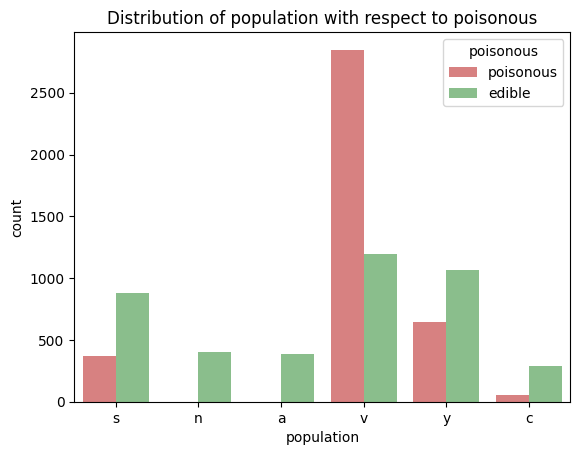

,Count,Percentage,Poisonous,Edible
population,,,,
a,384,4.726736,NaN,100.000000
c,340,4.185130,15.294118,84.705882
n,400,4.923683,NaN,100.000000
s,1248,15.361891,29.487179,70.512821
v,4040,49.729197,70.495050,29.504950
y,1712,21.073363,37.850467,62.149533



Habitat:


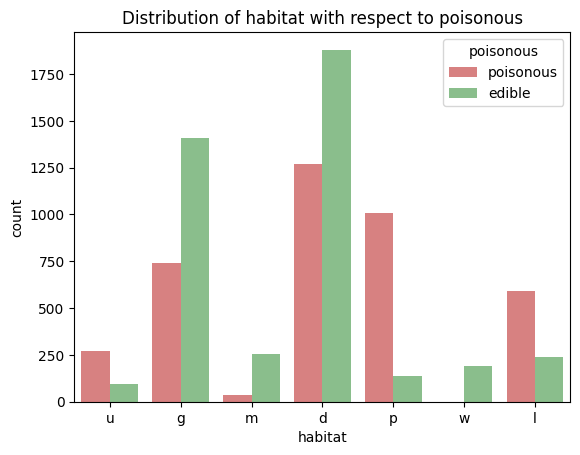

,Count,Percentage,Poisonous,Edible
habitat,,,,
d,3148,38.749385,40.279543,59.720457
g,2148,26.440177,34.450652,65.549348
l,832,10.241260,71.153846,28.846154
m,292,3.594289,12.328767,87.671233
p,1144,14.081733,88.111888,11.888112
u,368,4.529788,73.913043,26.086957
w,192,2.363368,NaN,100.000000


In [19]:
for feature in features:
    print(f"\n{feature.capitalize()}:")
    display(analyze_categorical_feature(df, feature, target='poisonous'))

In [20]:
df.nunique()

cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
poisonous                    2
dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encoding categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit encoder on full dataset
full_data = pd.concat(
    [X_train, X_test], axis=0
)
encoder.fit(full_data)

# Transform the training and test data
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

# Ensure y_train and y_test are 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Baseline model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [23]:
import pandas as pd

# Get the coefficients from the Logistic Regression model
coefficients = model.coef_[0]

# Get the feature names from the OneHotEncoder
feature_names = encoder.get_feature_names_out(input_features=df.drop(columns=['poisonous']).columns)

# Create a DataFrame to view feature names and their corresponding coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by absolute value of the coefficient to see the most influential features
coef_df['abs_coeff'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coeff', ascending=False)

# Display the top features
print(coef_df.head(10))

                Feature  Coefficient  abs_coeff
80  spore-print-color_r     4.639465   4.639465
22               odor_n    -3.969672   3.969672
18               odor_c     3.816149   3.816149
28          gill-size_n     3.608016   3.608016
19               odor_f     3.476959   3.476959
23               odor_p     2.685878   2.685878
27       gill-spacing_w    -2.589002   2.589002
41         stalk-root_c    -2.186670   2.186670
81  spore-print-color_u    -2.147393   2.147393
78  spore-print-color_n    -2.090095   2.090095


In [24]:
from sklearn.metrics import matthews_corrcoef

# Assuming y_test are the true labels and y_pred are the predictions from your model
mcc = matthews_corrcoef(y_test, y_pred)
print(f'Matthews Correlation Coefficient: {mcc}')


Matthews Correlation Coefficient: 1.0


This result is too perfect. We will check the kaggle dataset to see if it's the same.